In [0]:
from keras.datasets import mnist
from keras.layers import *
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential,Model
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
import math

In [0]:
(X_train,_),(_,_)=mnist.load_data()

In [0]:
print(X_train.shape)

(60000, 28, 28)


In [0]:
print(type(X_train))

<class 'numpy.ndarray'>


In [0]:
X_train=X_train.reshape((*X_train.shape,1))
print(X_train.shape)

(60000, 28, 28, 1)


In [0]:
# Normalise the data between -1 and +1
X_train=(X_train.astype('float32')-127.5)/127.5

In [0]:
print(np.min(X_train))
print(np.max(X_train))

-1.0
1.0


In [0]:
NUM_EPOCHS=50
BATCH_SIZE=256
NO_OF_BATCHES=math.ceil(X_train.shape[0]/float(BATCH_SIZE))
HALF_BATCH_SIZE=int(BATCH_SIZE/2)
NOISE_DIM=100
# use this ADam Parameter for GAN
adam=Adam(lr=2e-4,beta_1=0.5)

In [0]:
import warnings
warnings.filterwarnings('ignore')
# Define the generator
generator=Sequential()
generator.add(Dense(7*7*128,input_shape=(NOISE_DIM,)))
generator.add(Reshape((7,7,128)))
generator.add(LeakyReLU(0.2))
generator.add(BatchNormalization())

# Double Activation size 14X14X64
generator.add(UpSampling2D())
generator.add(Conv2D(64,kernel_size=(5,5),padding='same'))
generator.add(LeakyReLU(0.2))
generator.add(BatchNormalization())

# Double Activation Size 28X28X1
generator.add(UpSampling2D()) # increase your spatial size with the help of interpolation
generator.add(Conv2D(1,kernel_size=(5,5),padding='same',activation='tanh')) # reduces the no of channels.

generator.compile(loss='binary_crossentropy',optimizer='adam')
generator.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 6272)              633472    
_________________________________________________________________
reshape_2 (Reshape)          (None, 7, 7, 128)         0         
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 7, 7, 128)         0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 7, 7, 128)         512       
_________________________________________________________________
up_sampling2d_3 (UpSampling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 64)        204864    
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 14, 14, 64)       

In [0]:
# define the discriminator model
discriminator=Sequential()
discriminator.add(Conv2D(64,kernel_size=(5,5),strides=(2,2),padding='same',input_shape=(28,28,1)))
discriminator.add(LeakyReLU(0.2))

discriminator.add(Conv2D(128,(5,5),strides=(2,2),padding='same'))
discriminator.add(LeakyReLU(0.2))

discriminator.add(Flatten())
discriminator.add(Dense(1,activation='sigmoid'))

discriminator.compile(loss='binary_crossentropy',optimizer=Adam(lr=2e-4,beta_1=0.5))

discriminator.summary()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 14, 14, 64)        1664      
_________________________________________________________________
leaky_re_lu_7 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 7, 7, 128)         204928    
_________________________________________________________________
leaky_re_lu_8 (LeakyReLU)    (None, 7, 7, 128)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 6273      
Total params: 212,865
Trainable params: 212,865
Non-trainable params: 0
________________________________________________

In [0]:
# GAN
discriminator.trainable=False
gan_input=Input(shape=(NOISE_DIM,))
generated_img=generator(gan_input)
gan_output=discriminator(generated_img)

# functional API
model=Model(gan_input,gan_output)
model.compile(loss='binary_crossentropy',optimizer=adam)

In [0]:
import os
os.mkdir('images')
def save_imgs(epoch,samples=100):
    
    noise = np.random.normal(0,1,size=(samples,100))
    generated_imgs = generator.predict(noise)
    generated_imgs = generated_imgs.reshape(samples,28,28)
    
    plt.figure(figsize=(10,10))
    for i in range(samples):
        plt.subplot(10,10,i+1)
        #plt.imshow(generated_imgs[i],interpolation='nearest',cmap='gray')
        plt.imshow(generated_imgs[i].astype('uint8'),interpolation='nearest')
        plt.axis("off")
        
    plt.tight_layout()
    plt.savefig('images/gan_output_epoch_{0}.png'.format(epoch+1))
    plt.show()

Epoch 1 Discriminator loss 0.6865  Generator loss 0.9974
Epoch 2 Discriminator loss 0.7141  Generator loss 0.8657
Epoch 3 Discriminator loss 0.6966  Generator loss 0.8663
Epoch 4 Discriminator loss 0.6920  Generator loss 0.8615
Epoch 5 Discriminator loss 0.6970  Generator loss 0.8363
Epoch 6 Discriminator loss 0.6973  Generator loss 0.8275
Epoch 7 Discriminator loss 0.6965  Generator loss 0.8273
Epoch 8 Discriminator loss 0.6958  Generator loss 0.8286
Epoch 9 Discriminator loss 0.6953  Generator loss 0.8283
Epoch 10 Discriminator loss 0.6946  Generator loss 0.8338


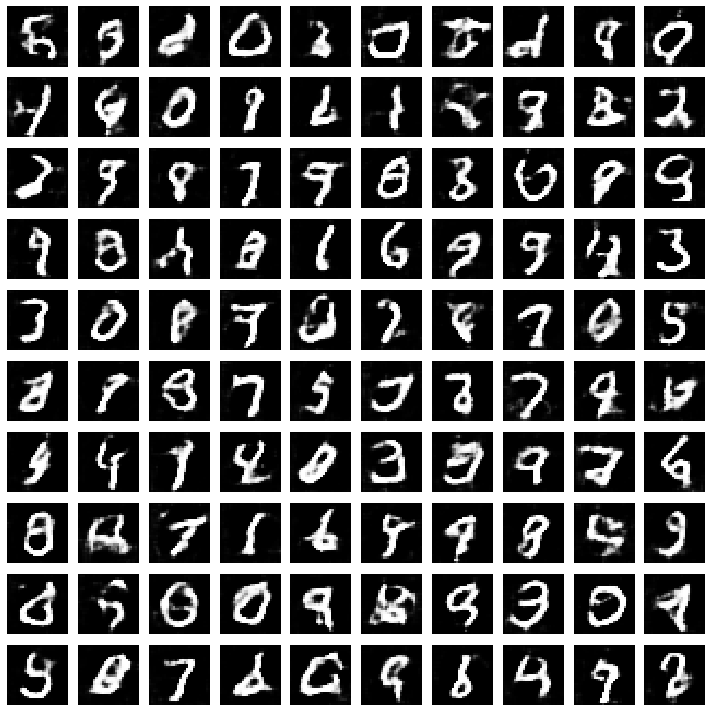

Epoch 11 Discriminator loss 0.6943  Generator loss 0.8323
Epoch 12 Discriminator loss 0.6946  Generator loss 0.8313
Epoch 13 Discriminator loss 0.6943  Generator loss 0.8396
Epoch 14 Discriminator loss 0.6951  Generator loss 0.8384
Epoch 15 Discriminator loss 0.6950  Generator loss 0.8436
Epoch 16 Discriminator loss 0.6948  Generator loss 0.8432
Epoch 17 Discriminator loss 0.6953  Generator loss 0.8477
Epoch 18 Discriminator loss 0.6960  Generator loss 0.8493
Epoch 19 Discriminator loss 0.6972  Generator loss 0.8470
Epoch 20 Discriminator loss 0.6984  Generator loss 0.8549


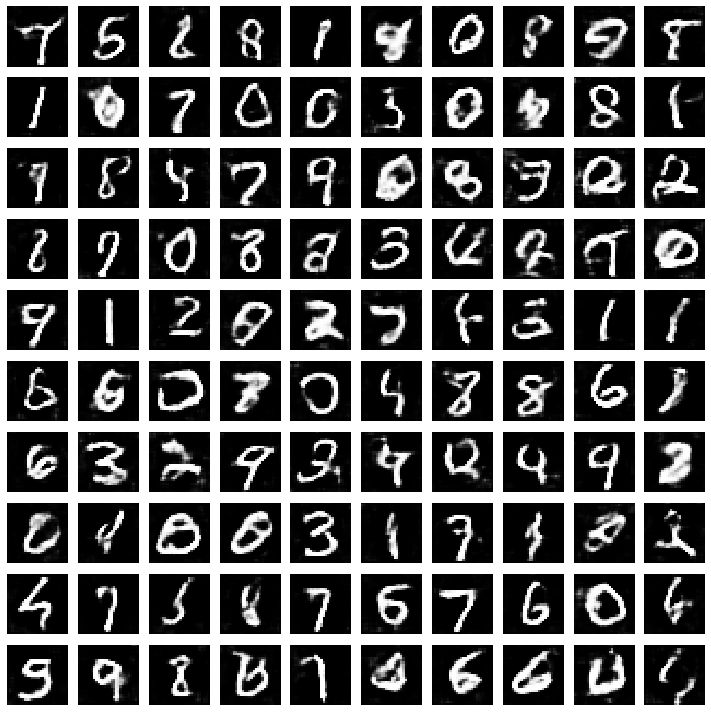

Epoch 21 Discriminator loss 0.7002  Generator loss 0.8577
Epoch 22 Discriminator loss 0.6998  Generator loss 0.8687
Epoch 23 Discriminator loss 0.7017  Generator loss 0.8680
Epoch 24 Discriminator loss 0.7026  Generator loss 0.8734
Epoch 25 Discriminator loss 0.7048  Generator loss 0.8737


In [0]:
#X_train=X_train.reshape((-1,784))
d_losses=[]
g_losses=[]
# Training loop
for epoch in range(NUM_EPOCHS):
  epoch_d_loss=0
  epoch_g_loss=0
  # mini_batch SGD
  for step in range(NO_OF_BATCHES):
    # step 1: Discriminator
    # Real data+Fake data
    # real data X
    idx=np.random.randint(0,X_train.shape[0],HALF_BATCH_SIZE)
    real_imgs=X_train[idx]
    # fake imgs X
    noise=np.random.normal(0,1,size=(HALF_BATCH_SIZE,NOISE_DIM))
    fake_imgs=generator.predict(noise) # forward pass of the noise to give u some fake images.
    # to train our discriminator, we need X as well as Y values
    # labels
    real_y=np.ones((HALF_BATCH_SIZE,1))*0.9
    fake_y=np.zeros((HALF_BATCH_SIZE,1))
    # Train our discriminator
    d_loss_real=discriminator.train_on_batch(real_imgs,real_y)
    d_loss_fake=discriminator.train_on_batch(fake_imgs,fake_y)
    d_loss=0.5*d_loss_real+0.5*d_loss_fake

    epoch_d_loss+=d_loss
    # Train Generator(Considering frozen discriminator)
    noise=np.random.normal(0,1,size=(BATCH_SIZE,NOISE_DIM))
    ground_truth_y=np.ones((BATCH_SIZE,1))
    g_loss=model.train_on_batch(noise,ground_truth_y)
    epoch_g_loss+=g_loss
    d_losses.append(epoch_d_loss/NO_OF_BATCHES)
    g_losses.append(epoch_g_loss/NO_OF_BATCHES)
  print("Epoch %d Discriminator loss %.4f  Generator loss %.4f"%(epoch+1,epoch_d_loss/NO_OF_BATCHES,epoch_g_loss/NO_OF_BATCHES))
  if (epoch+1)%10==0:
        #generator.save('model/gan_generator_{0}.h5'.format(epoch+1))
        save_imgs(epoch)